# Replication script for the paper "Exploiting Unit Test Generators for Code to Generate Abstract Tests for Models"

This script is used to replicate the results of the analyses presented in the paper.

## Data preparation


In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

Loading the necessary data

We read, for each of the 10 runs, the file `data.csv` that contains the results of the test generation process with the three approaches: **random**, **atgt**, and **evoavalla**

In [71]:
# Define a general dataframe to hold all data
all_data = pd.DataFrame()

atgt_and_evoavalla_data = f'data.csv'
random_data = f'data-rnd.csv'
valid_models = f'model_lists/model_list_all_valid.txt'
data_file_path = f'final-data.csv'

# Read valid models
with open(valid_models, 'r') as file:
    valid_model_list = [line.strip() for line in file.readlines()]

# Read and filter ATGT and EvoAvalla data
atgt_evoavalla_df = pd.read_csv(atgt_and_evoavalla_data, sep=',')
atgt_evoavalla_df['asm_path'] = atgt_evoavalla_df['asm_path'].str.replace('../../../asm_examples/', '', regex=False)
atgt_evoavalla_df = atgt_evoavalla_df[atgt_evoavalla_df['asm_path'].isin(valid_model_list)]
# Exclude rows where approach is 'random'
atgt_evoavalla_df = atgt_evoavalla_df[atgt_evoavalla_df['approach'] != 'random']

# Read and filter Random data
random_df = pd.read_csv(random_data, sep=',')
random_df['asm_path'] = random_df['asm_path'].str.replace('../../../asm_examples/', '', regex=False)
random_df = random_df[random_df['asm_path'].isin(valid_model_list)]

# merge dataframes
df = pd.concat([atgt_evoavalla_df, random_df], ignore_index=True)

# Change the decimal separator from . to , in the branch_coverage column
df['branch_coverage'] = df['branch_coverage'].astype(float)
df['rule_coverage'] = df['rule_coverage'].astype(float)
df['update_rule_coverage'] = df['update_rule_coverage'].astype(float)
df['macro_coverage'] = df['macro_coverage'].astype(float)

print (df.shape)

(160, 29)


## RQ2: Coverage

In [72]:
# Rename the approaches for better visualization
df['approach'] = df['approach'].replace({'evoavalla': 'EvoAvalla', 'atgt': 'ATGT', 'random4ea': 'Random_EA', 'random4atgt': 'Random_ATGT'})

# List of all coverage types
coverage_types = ['branch_coverage', 'rule_coverage', 'update_rule_coverage', 'macro_coverage']

# For each coverage type, calcolute mean and standard deviation
for coverage in coverage_types:
    print (f"\nCoverage Type: {coverage}")
    # For each approach, calculate the mean and standard deviation of the coverage column
    for approach in df['approach'].unique():
        # Filter the dataframe for the current approach
        approach_data = df[df['approach'] == approach]

        # Calculate mean and standard deviation
        mean_coverage = approach_data[coverage].mean()
        std_coverage = approach_data[coverage].std()

        # Print the results
        print(f"Approach: {approach}, Mean {coverage}: {mean_coverage:.2f}, Std Dev: {std_coverage:.2f}")

    # Perform Wilcoxon signed-rank test for coverage between EvoAvalla and ATGT
    evoavalla_data = df[df['approach'] == 'EvoAvalla'][coverage]
    atgt_data = df[df['approach'] == 'ATGT'][coverage]
    random4ea_data = df[df['approach'] == 'Random_EA'][coverage]
    random4atgt_data = df[df['approach'] == 'Random_ATGT'][coverage]
    # Perform Wilcoxon signed-rank test for coverage between evoavalla and ATGT
    stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between Random and ATGT
    stat, p_value = wilcoxon(random4ea_data, atgt_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between Random4ea and atgt: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between Random and ATGT
    stat, p_value = wilcoxon(random4atgt_data, atgt_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between Random4atgt and atgt: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between EvoAvalla and Random
    stat, p_value = wilcoxon(evoavalla_data, random4ea_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between EvoAvalla and Random4ea: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between Random and evoavalla
    stat, p_value = wilcoxon(random4atgt_data, evoavalla_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between Random4atgt and Evoavalla: statistic={stat}, p-value={p_value}")



Coverage Type: branch_coverage
Approach: EvoAvalla, Mean branch_coverage: 0.86, Std Dev: 0.20
Approach: ATGT, Mean branch_coverage: 0.98, Std Dev: 0.04
Approach: Random_EA, Mean branch_coverage: 0.58, Std Dev: 0.24
Approach: Random_ATGT, Mean branch_coverage: 0.76, Std Dev: 0.21
Wilcoxon test between EvoAvalla and atgt: statistic=32.5, p-value=0.00010300218487828254
Wilcoxon test between Random4ea and atgt: statistic=0.0, p-value=7.685308358812079e-08
Wilcoxon test between Random4atgt and atgt: statistic=0.0, p-value=3.7732222813413115e-06
Wilcoxon test between EvoAvalla and Random4ea: statistic=0.0, p-value=3.6243102839406855e-07
Wilcoxon test between Random4atgt and Evoavalla: statistic=119.5, p-value=0.02009054104913558

Coverage Type: rule_coverage
Approach: EvoAvalla, Mean rule_coverage: 0.93, Std Dev: 0.18
Approach: ATGT, Mean rule_coverage: 0.99, Std Dev: 0.02
Approach: Random_EA, Mean rule_coverage: 0.56, Std Dev: 0.23
Approach: Random_ATGT, Mean rule_coverage: 0.75, Std Dev: 

/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


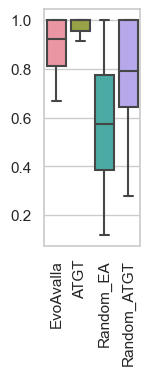

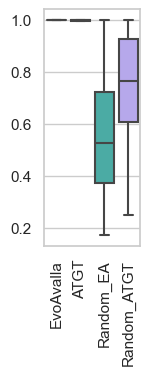

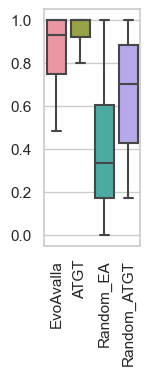

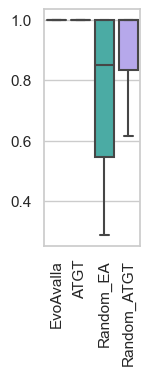

In [73]:
# Draw a plot for each coverage type
for coverage in coverage_types:
    # Generate a box-plot with the update rule, macro and coverage for all approaches
    sns.set(style="whitegrid")
    # Create a boxplot
    plt.figure(figsize=(2, 3))
    # EvoAvalla must be blue, Random must be orange, and ATGT must be green
    sns.set_palette(['#1f77b4', '#ff7f0e', '#2ca02c'])
    sns.boxplot(x='approach', y=coverage, data=df, showfliers=False)
    # set log scale for y-axis
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.xticks(rotation=90)

    # Save the image as pdf
    plt.savefig(f'images/boxplot_{coverage}.pdf', bbox_inches='tight')

## RQ2: Mutation score


Mutation Score Analysis:
Approach: EvoAvalla, Mean mutation score: 0.62, Std Dev: 0.27
Approach: ATGT, Mean mutation score: 0.72, Std Dev: 0.11
Approach: Random_EA, Mean mutation score: 0.46, Std Dev: 0.23
Approach: Random_ATGT, Mean mutation score: 0.61, Std Dev: 0.19
Wilcoxon test between EvoAvalla and atgt: statistic=308.0, p-value=0.6944263662737999
Wilcoxon test between Random4ea and atgt: statistic=1.0, p-value=8.38735519312415e-08
Wilcoxon test between Random4atgt and atgt: statistic=54.0, p-value=8.606090591064346e-05
Wilcoxon test between EvoAvalla and Random4ea: statistic=98.5, p-value=0.0002294340732221864
Wilcoxon test between Random4atgt and Evoavalla: statistic=263.0, p-value=0.18180066967502828


/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


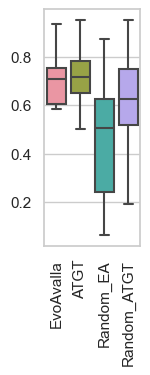

In [84]:
# For each model and approach, calculate the average mutation score. Consider the mutation scores in the columns 'casemutator_score', 'rulemutator_score', 'choosemutator_score' and exclude from the computation the values NaN.
# Then, calculate mean and standard deviation of mutation scores for each approach.
mutation_score_columns = ['casemutator_score', 'ruleremover_score', 'chooserulemutator_score', 'condnegator_score', 'forallmutator_score', 'partoseqmutator_score', 'seqtoparmutator_score', 'condremover_score']
df['mutation_score'] = df[mutation_score_columns].mean(axis=1, skipna=True)
print ("\nMutation Score Analysis:")
for approach in df['approach'].unique():
    # Filter the dataframe for the current approach
    approach_data = df[df['approach'] == approach]

    # Calculate mean and standard deviation
    mean_mutation_score = approach_data['mutation_score'].mean()
    std_mutation_score = approach_data['mutation_score'].std()

    # Print the results
    print(f"Approach: {approach}, Mean mutation score: {mean_mutation_score:.2f}, Std Dev: {std_mutation_score:.2f}")

# Perform Wilcoxon signed-rank test for coverage between Random and ATGT
evoavalla_data = df[df['approach'] == 'EvoAvalla']['mutation_score']
atgt_data = df[df['approach'] == 'ATGT']['mutation_score']
random4ea_data = df[df['approach'] == 'Random_EA']['mutation_score']
random4atgt_data = df[df['approach'] == 'Random_ATGT']['mutation_score']
# Perform Wilcoxon signed-rank test for coverage between evoavalla and ATGT
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between Random and ATGT
stat, p_value = wilcoxon(random4ea_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4ea and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between Random and ATGT
stat, p_value = wilcoxon(random4atgt_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4atgt and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between EvoAvalla and Random
stat, p_value = wilcoxon(evoavalla_data, random4ea_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and Random4ea: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between Random and evoavalla
stat, p_value = wilcoxon(random4atgt_data, evoavalla_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4atgt and Evoavalla: statistic={stat}, p-value={p_value}")  

# Draw a boxplot for mutation score and approaches
sns.set(style="whitegrid")
# Create a boxplot
plt.figure(figsize=(2, 3))
# EvoAvalla must be blue, Random must be orange, and ATGT must be green
sns.set_palette(['#1f77b4', '#ff7f0e', '#2ca02c'])
sns.boxplot(x='approach', y='mutation_score', data=df, showfliers=False)           
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.xticks(rotation=90) 
# Save the image as pdf
plt.savefig(f'images/boxplot_mutation_score.pdf', bbox_inches='tight')  

## RQ3: Test generation time

Approach: EvoAvalla, Mean Execution Time: 80543.24, Std Dev: 14531.46
Approach: Random, Mean Execution Time: 13.68, Std Dev: 65.73
Approach: ATGT, Mean Execution Time: 795.74, Std Dev: 810.20
Wilcoxon test between EvoAvalla and ATGT: statistic=0.0, p-value=7.849526548031477e-15
Wilcoxon test between Random and ATGT: statistic=52.0, p-value=5.450741706745431e-14
Wilcoxon test between EvoAvalla and Random: statistic=0.0, p-value=1.0114520744886418e-24


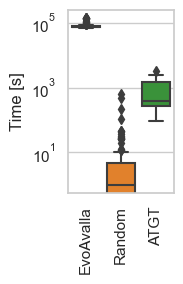

In [ ]:
# For each approach, calculate the mean and standard deviation of the 'exec_time' column    
for approach in all_data['approach'].unique():
    # Filter the dataframe for the current approach
    approach_data = all_data[all_data['approach'] == approach]

    # Calculate mean and standard deviation
    mean_exec_time = approach_data['exec_time'].mean()
    std_exec_time = approach_data['exec_time'].std()

    # Print the results
    print(f"Approach: {approach}, Mean Execution Time: {mean_exec_time:.2f}, Std Dev: {std_exec_time:.2f}")

# Perform Wilcoxon signed-rank test for time between EvoAvalla and ATGT
evoavalla_data = all_data[all_data['approach'] == 'EvoAvalla']['exec_time']
atgt_data = all_data[all_data['approach'] == 'ATGT']['exec_time']
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and ATGT: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for time between Random and ATGT
random_data = all_data[all_data['approach'] == 'Random']['exec_time']
stat, p_value = wilcoxon(random_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random and ATGT: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for time between EvoAvalla and Random
stat, p_value = wilcoxon(evoavalla_data, random_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and Random: statistic={stat}, p-value={p_value}")

# Generate a boxplot for the execution times of each approach
# Set the style of seaborn
sns.set(style="whitegrid")
# Create a boxplot
plt.figure(figsize=(2, 3))
# EvoAvalla must be blue, Random must be orange, and ATGT must be green
sns.set_palette(['#1f77b4', '#ff7f0e', '#2ca02c'])
sns.boxplot(x='approach', y='exec_time', data=all_data)
# set log scale for y-axis
plt.yscale('log')
plt.xlabel('')
plt.ylabel('Time [s]')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the image as pdf
plt.savefig('images/boxplot_exec_time.pdf', bbox_inches='tight')

## RQ4: Size of test suites

In [ ]:
# For each approach, calculate the mean and standard deviation of the 'n_scenarios' column
for approach in all_data['approach'].unique():
    # Filter the dataframe for the current approach
    approach_data = all_data[all_data['approach'] == approach]

    # Calculate mean and standard deviation
    mean_n_scenarios = approach_data['n_scenarios'].mean()
    std_n_scenarios = approach_data['n_scenarios'].std()

    # Print the results
    print(f"Approach: {approach}, Mean Number of Scenarios: {mean_n_scenarios:.2f}, Std Dev: {std_n_scenarios:.2f}")

# Perform Wilcoxon signed-rank test for n_scenarios between EvoAvalla and ATGT
evoavalla_data = all_data[all_data['approach'] == 'EvoAvalla']['n_scenarios']
atgt_data = all_data[all_data['approach'] == 'ATGT']['n_scenarios']
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and ATGT: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for n_scenarios between Random and ATGT
random_data = all_data[all_data['approach'] == 'Random']['n_scenarios']
stat, p_value = wilcoxon(random_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random and ATGT: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for n_scenarios between EvoAvalla and Random
stat, p_value = wilcoxon(evoavalla_data, random_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and Random: statistic={stat}, p-value={p_value}")

Approach: EvoAvalla, Mean Number of Scenarios: 3.81, Std Dev: 5.66
Approach: Random, Mean Number of Scenarios: 4.17, Std Dev: 5.56
Approach: ATGT, Mean Number of Scenarios: 5.87, Std Dev: 9.51
Wilcoxon test between EvoAvalla and ATGT: statistic=3394.5, p-value=0.080351452771691
Wilcoxon test between Random and ATGT: statistic=4667.0, p-value=0.5764097240934651
Wilcoxon test between EvoAvalla and Random: statistic=3121.5, p-value=0.18067409842206195


In [ ]:
# For each approach, calculate the mean and standard deviation of the 'n_step' column
for approach in all_data['approach'].unique():
    # Filter the dataframe for the current approach
    approach_data = all_data[all_data['approach'] == approach]

    # Calculate mean and standard deviation
    mean_n_step = approach_data['n_step'].mean()
    std_n_step = approach_data['n_step'].std()

    # Print the results
    print(f"Approach: {approach}, Mean Number of Steps: {mean_n_step:.2f}, Std Dev: {std_n_step:.2f}")

# Perform Wilcoxon signed-rank test for n_steps between EvoAvalla and ATGT
evoavalla_data = all_data[all_data['approach'] == 'EvoAvalla']['n_step']
atgt_data = all_data[all_data['approach'] == 'ATGT']['n_step']
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and ATGT: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for n_steps between Random and ATGT
random_data = all_data[all_data['approach'] == 'Random']['n_step']
stat, p_value = wilcoxon(random_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random and ATGT: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for n_steps between EvoAvalla and Random
stat, p_value = wilcoxon(evoavalla_data, random_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and Random: statistic={stat}, p-value={p_value}")

Approach: EvoAvalla, Mean Number of Steps: 7.83, Std Dev: 13.42
Approach: Random, Mean Number of Steps: 11.00, Std Dev: 14.50
Approach: ATGT, Mean Number of Steps: 160.38, Std Dev: 321.87
Wilcoxon test between EvoAvalla and ATGT: statistic=118.0, p-value=5.632551525699182e-13
Wilcoxon test between Random and ATGT: statistic=268.0, p-value=2.3089244022794722e-10
Wilcoxon test between EvoAvalla and Random: statistic=2771.5, p-value=0.0008230122464156096


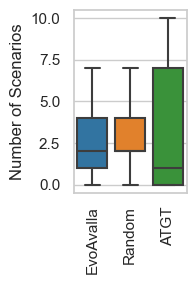

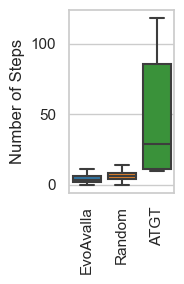

In [ ]:
# Generate a figure containing two boxplots: one for the number of scenarios and one for the number of steps
plt.figure(figsize=(2, 3))
# Create a boxplot for the number of scenarios
sns.set(style="whitegrid")
sns.set_palette(['#1f77b4', '#ff7f0e', '#2ca02c'])
sns.boxplot(x='approach', y='n_scenarios', data=all_data, showfliers=False)
plt.xlabel('')
plt.ylabel('Number of Scenarios')
# Set x ticks to be rotated
plt.xticks(rotation=90)
plt.tight_layout()
# Save the image as pdf
plt.savefig('images/boxplot_n_scenarios.pdf', bbox_inches='tight')
# Create a boxplot for the number of steps
plt.figure(figsize=(2, 3))
sns.set(style="whitegrid")
sns.set_palette(['#1f77b4', '#ff7f0e', '#2ca02c'])
sns.boxplot(x='approach', y='n_step', data=all_data, showfliers=False)
plt.xlabel('')
plt.ylabel('Number of Steps')
# Set x ticks to be rotated
plt.xticks(rotation=90)
plt.tight_layout()
# Save the image as pdf
plt.savefig('images/boxplot_n_steps.pdf', bbox_inches='tight')